In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight') 
%matplotlib inline

In [2]:
df = pd.read_csv('clubs.csv', parse_dates=['date_created'])

In [3]:
df.describe()

,capacity_current,capacity_max,percentage
count,841976.000000,841976.000000,841976.000000
mean,39.774233,293.556262,13.131315
std,48.887224,150.482010,15.985477
min,0.000000,0.000000,0.000000
25%,0.000000,220.000000,0.000000
50%,24.000000,287.500000,8.000000
75%,66.000000,350.000000,22.000000
max,377.000000,700.000000,139.000000


In [4]:
df.head()

,id,name,capacity_current,capacity_max,date_created,percentage
0,122022-05-30 13:32:37.359492,Islington Angel,48,350,2022-05-30 14:32:37.359494,13
1,122022-05-30 13:35:01.992297,Islington Angel,43,350,2022-05-30 14:35:01.992299,12
2,122022-05-30 13:40:02.153674,Islington Angel,39,350,2022-05-30 14:40:02.153676,11
3,122022-05-30 13:45:02.306688,Islington Angel,35,350,2022-05-30 14:45:02.306690,10
4,122022-05-30 13:50:02.422309,Islington Angel,35,350,2022-05-30 14:50:02.422312,10


In [5]:
df[['name', 'percentage']].groupby('name').mean()

,percentage
name,
Aldersgate,7.901321
Bank,8.211339
Broadgate / Liverpool Street,3.707213
Bromley,23.201419
Canary Riverside,30.933387
Cannon Street / Walbrook,5.436231
Chelmsford,18.316773
Chiswick Park,15.550986
Chiswick Riverside,6.422592


In [6]:
# just canary data
df_canary = df.loc[df['name'] == 'Canary Riverside']

In [7]:
df_canary.describe()

,capacity_current,capacity_max,percentage
count,23389.000000,23389.0,23389.000000
mean,37.459447,120.0,30.933387
std,36.034700,0.0,29.886618
min,0.000000,120.0,0.000000
25%,0.000000,120.0,0.000000
50%,39.000000,120.0,32.000000
75%,61.000000,120.0,50.000000
max,167.000000,120.0,139.000000


In [8]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']

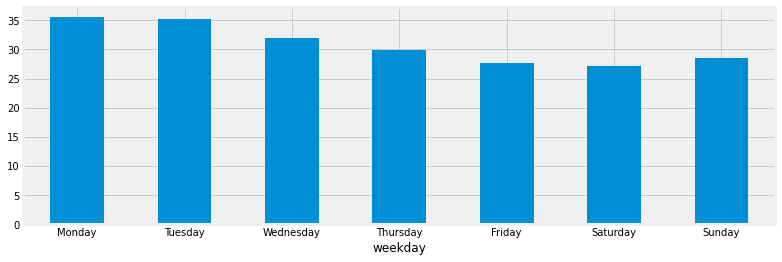

In [9]:
#creating weekday column
df_canary['weekday'] = df_canary['date_created'].dt.day_name()
fig, axs = plt.subplots(figsize=(12, 4))
# Average capacity per Weekday
df_canary.groupby(df_canary["weekday"])["percentage"].mean().reindex(days).plot(kind='bar', rot=0, ax=axs)

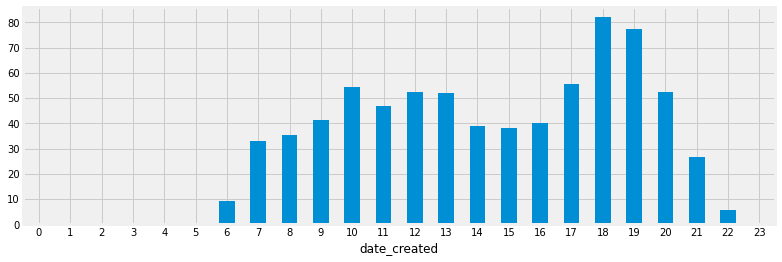

In [10]:
fig, axs = plt.subplots(figsize=(12, 4))
# Average capacity per hour
df_canary.groupby(df_canary["date_created"].dt.hour)["percentage"].mean().plot(kind='bar', rot=0, ax=axs)

In [11]:
#pivot by weekday
df_canary = df_canary.pivot(index="date_created", columns="weekday", values="percentage")

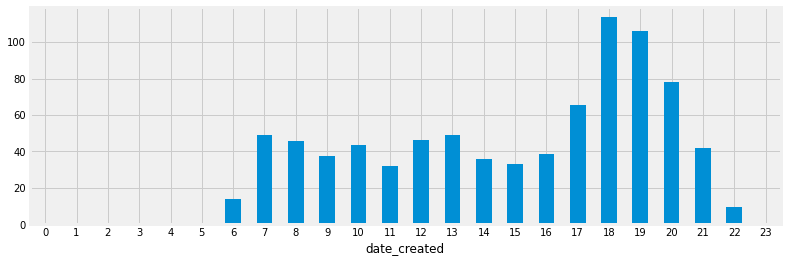

In [12]:
fig, axs = plt.subplots(figsize=(12, 4))
# Average capacity per hour on Monday
df_canary.groupby(df_canary.index.hour)["Monday"].mean().plot(kind='bar', rot=0, ax=axs)

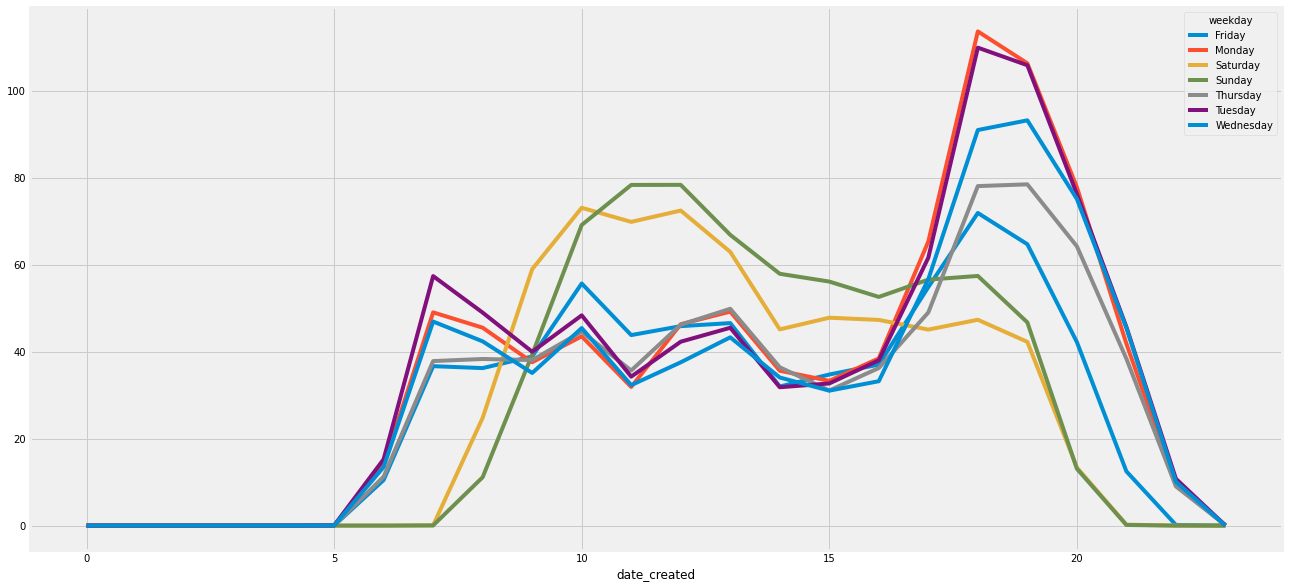

In [13]:
fig, axs = plt.subplots(figsize=(20, 10))
# Average capacity per hour per weekday
df_canary.groupby(df_canary.index.hour).mean().plot(kind='line', rot=0, ax=axs)
plt.savefig('plot1.png')

In [14]:
df_canary = df_canary.groupby(df_canary.index.hour).mean()

In [15]:
# exporting to plot in data studio
df_canary.to_csv('avg_by_day_canary.csv')

In [16]:
# Just aldersgates data
df_aldersgate = df.loc[df['name'] == 'Aldersgate']

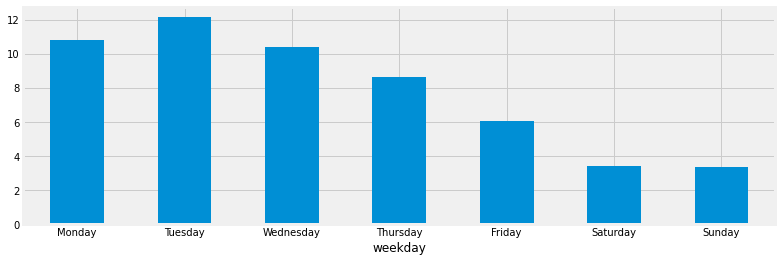

In [17]:
df_aldersgate['weekday'] = df_aldersgate['date_created'].dt.day_name()
fig, axs = plt.subplots(figsize=(12, 4))
# Average capacity per weekday
df_aldersgate.groupby(df_aldersgate["weekday"])["percentage"].mean().reindex(days).plot(kind='bar', rot=0, ax=axs)

In [18]:
# leave only hours and save
df_aldersgate = df_aldersgate.pivot(index="date_created", columns="weekday", values="percentage")
df_aldersgate = df_aldersgate.groupby(df_aldersgate.index.hour).mean()
df_aldersgate.to_csv('avg_by_day_aldersgate.csv')

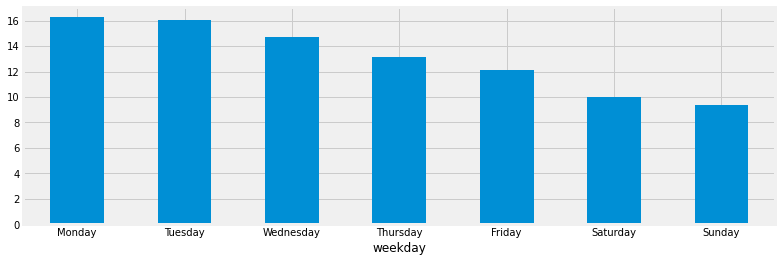

In [19]:
df['weekday'] = df['date_created'].dt.day_name()
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df["weekday"])["percentage"].mean().reindex(days).plot(kind='bar', rot=0, ax=axs)

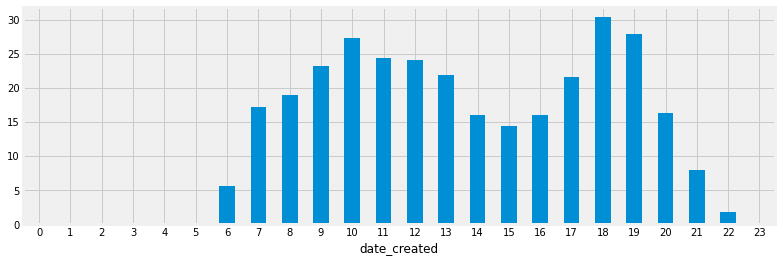

In [20]:
fig, axs = plt.subplots(figsize=(12, 4))
# average capacity per hour for all gyms together
df.groupby(df["date_created"].dt.hour)["percentage"].mean().plot(kind='bar', rot=0, ax=axs)

In [21]:
# Pivoting on weekday
df = df.pivot(index="date_created", columns="weekday", values="percentage")

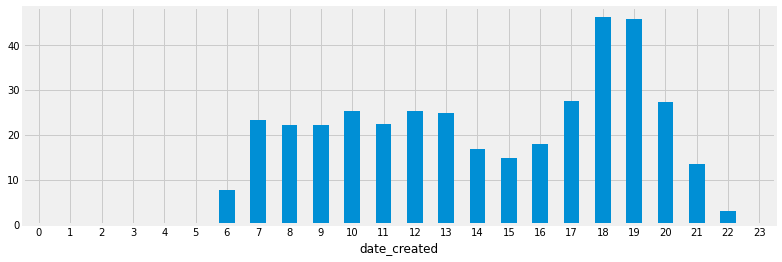

In [22]:
fig, axs = plt.subplots(figsize=(12, 4))
# Average capacity per hour on Monday
df.groupby(df.index.hour)["Monday"].mean().plot(kind='bar', rot=0, ax=axs)

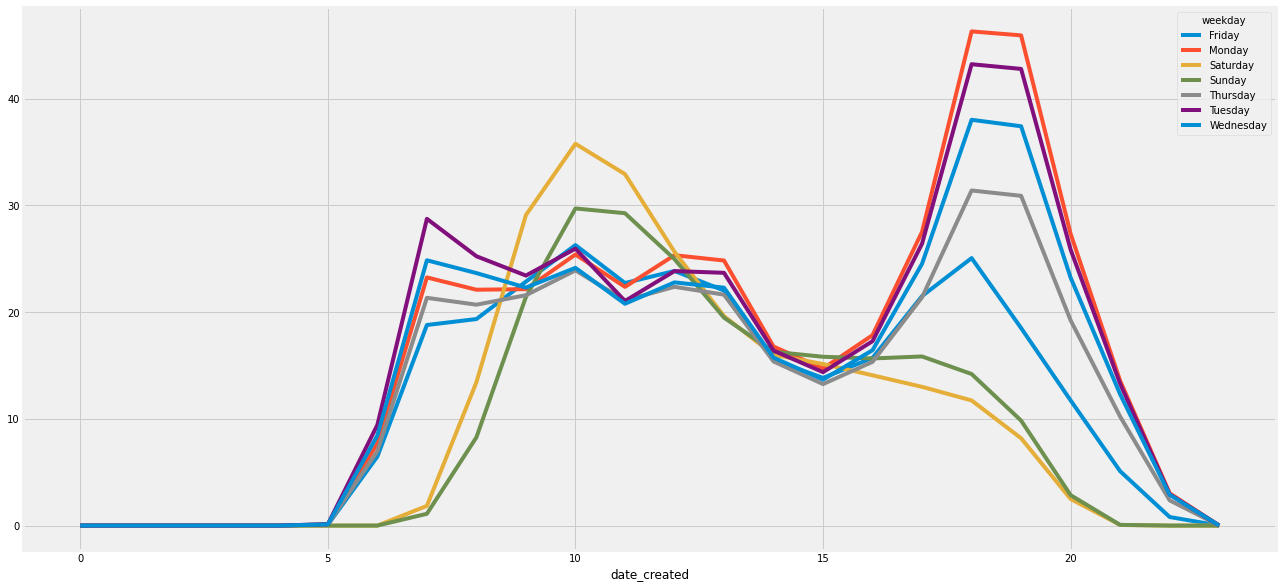

In [23]:
fig, axs = plt.subplots(figsize=(20, 10))
# Average capacity per hour per weekday
df.groupby(df.index.hour).mean().plot(kind='line', rot=0, ax=axs)
plt.savefig('plot2.png')

In [24]:
# Again to datastudio for pretty charts, leaving only hours
df = df.groupby(df.index.hour).mean()
df.to_csv('avg_by_day_all.csv')